# Practice 1. Numerical Optimization: General Review

Authors: Marc Ballestero and Iris Vukovic

# Gradient descent methods
## A simple quadratic function

We begin with a simple two-dimensional function, namely $f(x) = x_2^1 + x_2^2$ where, $x ∈ R^2$, $x = (x_1, x_2)^T$ (vectors are expressed as columns).

First, we make suface and contour plots of the function.

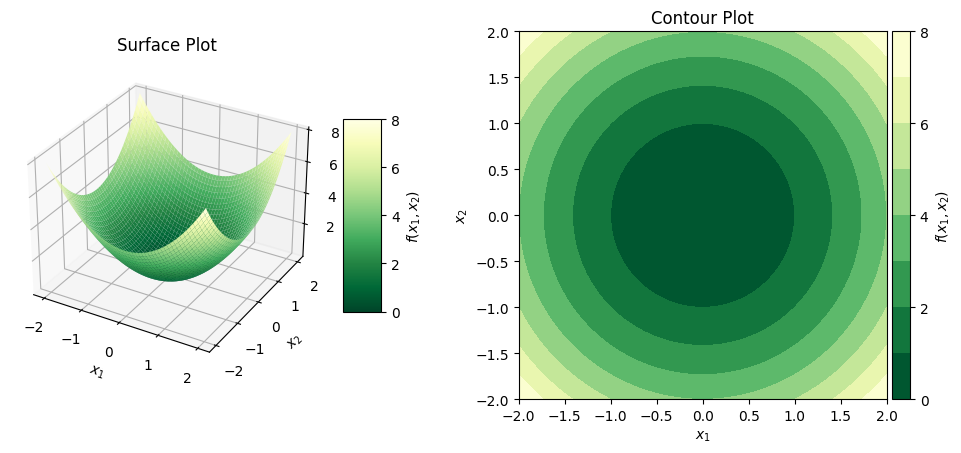

In [ ]:
import numpy as np
from math import floor, ceil

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

from cycler import cycler


import numpy as np
import matplotlib.pyplot as plt
import random
from mpl_toolkits.axes_grid1 import make_axes_locatable

f = np.vectorize(lambda x1, x2: x1**2 + x2**2)

x1 = np.linspace(-2, 2, num=200)
x2 = np.linspace(-2, 2, num=200)
[xx1,xx2] = np.meshgrid(x1,x2)

z = f(xx1, xx2)

# Plot the function
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)


# Surface plot of the function
ax1.set_title('Surface Plot')
ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$x_2$')
ax1.set_zlabel(r'$f(x_1, x_2)$')

surface = ax1.plot_surface(xx1, xx2, z, cmap='YlGn_r', vmin=z.min(), vmax=z.max())
cbar1 = fig.colorbar(surface, shrink=.5, aspect=5, label=r'$f(x_1, x_2)$')
cbar1.set_ticks(np.linspace(z.min(), z.max(), num=5))

# Contour plot of the function
ax2.set_title('Contour Plot')
ax2.set_aspect('equal')
ax2.set_xlabel(r'$x_1$')
ax2.set_ylabel(r'$x_2$')


contour = ax2.contourf(xx1, xx2, z, cmap='YlGn_r')

divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar2 = fig.colorbar(contour, label=r'$f(x_1, x_2)$', cax=cax)
cbar2.set_ticks(np.linspace(z.min(), z.max(), num=5))
plt.subplots_adjust(left=0.05, right=0.95, wspace=0.3)
plt.show()

We begin some experiments with gradient descent using a constant step
$$
\mathbf{x}^{k+1} = \mathbf{x}^k - \alpha^k \nabla f(\mathbf{x}^k).
$$



#### (1) We implement the previous algorithm with a constant $α^k = 0.1$ parameter and draw the path that the gradient descent follows for each of the starting points $x_0$ we have studied.

Descent path: (-0.267,  0.554) -> (-0.000,  0.000). Iterations for convergence =  53
Descent path: ( 0.427,  1.584) -> ( 0.000,  0.000). Iterations for convergence =  57
Descent path: ( 0.628,  0.106) -> ( 0.000,  0.000). Iterations for convergence =  53
Descent path: (-0.186, -1.314) -> (-0.000, -0.000). Iterations for convergence =  56
Descent path: ( 1.209, -1.456) -> ( 0.000, -0.000). Iterations for convergence =  58


<Figure size 640x480 with 0 Axes>

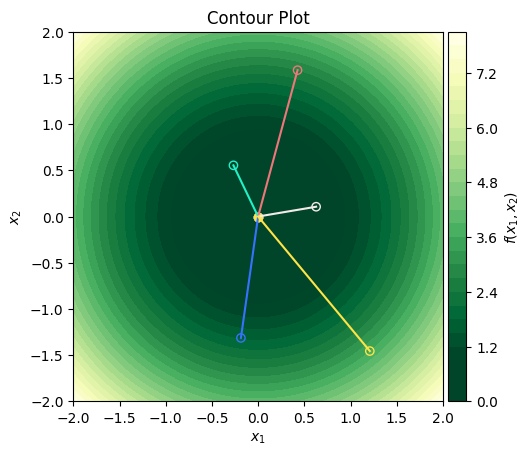

In [ ]:
grad_f = lambda x1, x2: np.array([2*x1, 2*x2])
norm_grad_f = lambda x1, x2: np.linalg.norm(grad_f(x1, x2))

norm_grad_f = np.vectorize(norm_grad_f)

def basic_gradient_descent(x0: np.ndarray, alpha: float, n_iter: int, f, grad_f) -> np.ndarray:
  """
  This function performs gradient descent from x0 with step size alpha
  for n_iter iterations. It returns a list of all the points visited by the
  descent algorithm.
  """
  x = x0
  path = np.array([x])
  for _ in range(n_iter):
    x = x - alpha*grad_f(x[0], x[1])
    path = np.vstack([path, x])
  return path

plt.clf()

fig, ax = plt.subplots()

# Contour plot of the function
ax.set_title('Contour Plot')
ax.set_aspect('equal')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')


contour = ax.contourf(xx1, xx2, z, cmap='YlGn_r', levels=30, vmin=ceil(z.min()), vmax=ceil(z.max()))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar2 = fig.colorbar(contour, label=r'$f(x_1, x_2)$', cax=cax)
cbar2.set_ticks(contour.levels[::4])
plt.subplots_adjust(left=0.05, right=0.95, wspace=0.3)

# Plot the gradient descent path from a collection of starting points
x1_random = np.random.uniform(low=-2, high=2, size=5)
x2_random = np.random.uniform(low=-2, high=2, size=5)
starting_points = np.array([
  [-0.267,  0.554],
  [ 0.427,  1.584],
  [ 0.628,  0.106],
  [-0.186, -1.314],
  [ 1.209, -1.456],
])

colors = ['#23F0C7', '#EF767A', '#F4EBE8', '#3772FF', '#FFE347']
ax.set_prop_cycle(cycler('color', colors))
for point in starting_points:
  path = basic_gradient_descent(point, alpha=0.1, n_iter=100, f=f, grad_f=grad_f)

  X, Y = path[:, 0], path[:, 1]

  color = ax._get_lines.get_next_color()

  ax.plot(X, Y, f'-', color=color)
  ax.scatter(X[-1], Y[-1], color=color)
  ax.scatter(X[0], Y[0], facecolor='none', edgecolor=color)

  # Check when the convergence criteria is satisfied within the path
  convergence_len = 0
  for i in range(len(path)-1):
    if norm_grad_f(X[i], Y[i]) < 1e-5:
      convergence_len = i
      break

  print(f"Descent path: ({X[0]: .3f}, {Y[0]: .3f}) -> ({X[-1]: .3f}, {Y[-1]: .3f}). Iterations for convergence = {convergence_len: d}")

ax.set_ylim(-2, 2)
ax.set_xlim(-2, 2)
plt.show()

#### (2) Here, we set $\alpha^k = 1$ and $\alpha^k = 2$ to demonstrate how poorly the algorithm performs with such a large step.



Descent path: (-0.267,  0.554) -> (-2.670e-01,  5.540e-01). Alpha: 1.0 Iters. for convergence = n/d
Descent path: ( 0.427,  1.584) -> ( 2.201e+47,  8.164e+47). Alpha: 2.0 Iters. for convergence = n/d
Descent path: ( 0.628,  0.106) -> ( 6.280e-01,  1.060e-01). Alpha: 1.0 Iters. for convergence = n/d
Descent path: (-0.186, -1.314) -> (-9.586e+46, -6.772e+47). Alpha: 2.0 Iters. for convergence = n/d
Descent path: ( 1.209, -1.456) -> ( 1.209e+00, -1.456e+00). Alpha: 1.0 Iters. for convergence = n/d


<Figure size 640x480 with 0 Axes>

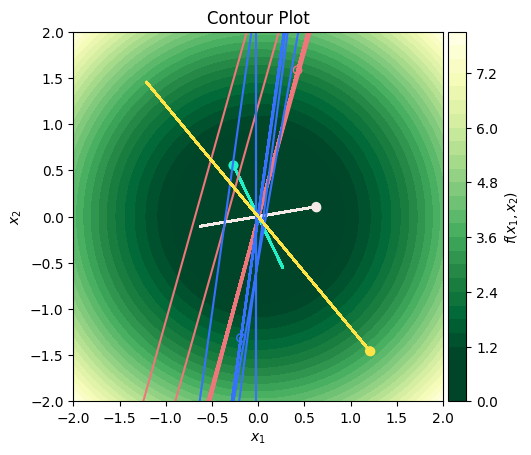

In [ ]:
plt.clf()

fig, ax = plt.subplots()

# Contour plot of the function
ax.set_title('Contour Plot')
ax.set_aspect('equal')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')


contour = ax.contourf(xx1, xx2, z, cmap='YlGn_r', levels=30, vmin=ceil(z.min()), vmax=ceil(z.max()))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar2 = fig.colorbar(contour, label=r'$f(x_1, x_2)$', cax=cax)
cbar2.set_ticks(contour.levels[::4])
plt.subplots_adjust(left=0.05, right=0.95, wspace=0.3)

colors = ['#23F0C7', '#EF767A', '#F4EBE8', '#3772FF', '#FFE347']
ax.set_prop_cycle(cycler('color', colors))
for j, point in enumerate(starting_points):
  alpha=1. if j%2 == 0 else 2.
  path = basic_gradient_descent(point, alpha=alpha, n_iter=100, f=f, grad_f=grad_f)

  X, Y = path[:, 0], path[:, 1]

  color = ax._get_lines.get_next_color()

  ax.plot(X, Y, f'-', color=color)
  ax.scatter(X[-1], Y[-1], color=color)
  ax.scatter(X[0], Y[0], facecolor='none', edgecolor=color)

  # Check when the convergence criteria is satisfied within the path
  convergence_len = 0
  for i in range(len(path)-1):
    if norm_grad_f(X[i], Y[i]) < 1e-5:
      convergence_len = i
      break

  convergence_len = 'n/d' if convergence_len == 0 else convergence_len

  print(f"Descent path: ({X[0]: .3f}, {Y[0]: .3f}) -> ({X[-1]: .3e}, {Y[-1]: .3e}). Alpha: {alpha:.1f} Iters. for convergence = {convergence_len}")

ax.set_ylim(-2, 2)
ax.set_xlim(-2, 2)
plt.show()

As can be seen on the plot, the method behaves poorly with such high values for the step size. Far from converging, the algorithm bounces between points of the graph of the function.

## A function with multiple minima

We will be working with the function $f:\mathbb{R} \to \mathbb{R}$, defined by:
$$
  f(\mathbf{x}) = x_1^2\left (4 - 2.1x_1^2 + \frac{1}{3}x_1^4\right) + x_1 x_2 + x_2^2\left(-4+4x^2 \right).
$$

Let us make a contour plot of the previous function in the $[-2, 2] \times [-1, 1]$ range.

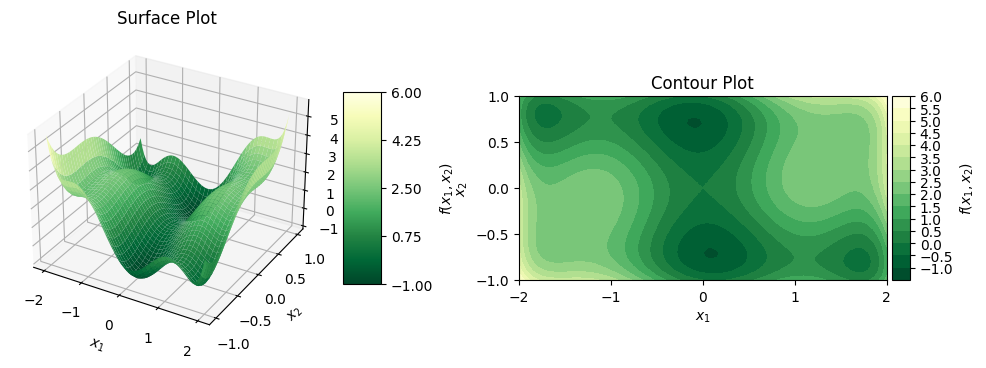

In [ ]:


# We will plot the function in the set [-2, 2] x [-1, 1].
x1_range = np.arange(-2, 2.05, step=0.05)
x2_range = np.arange(-1, 1.05, step=0.05)

xx1, xx2 = np.meshgrid(x1_range, x2_range)

# Define our function of interest as f
f = lambda x1, x2: x1**2*(4-2.1*x1**2+(1/3)*x1**4) + x1*x2 + x2**2*(-4+4*x2**2)

z = f(xx1, xx2)

# Plot the function
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)


# Surface plot of the function
ax1.set_title('Surface Plot')
ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$x_2$')
ax1.set_zlabel(r'$f(x_1, x_2)$')

surface = ax1.plot_surface(xx1, xx2, z, cmap='YlGn_r', vmin=ceil(z.min()), vmax=ceil(z.max()))
cbar1 = fig.colorbar(surface, shrink=.5, aspect=5, label=r'$f(x_1, x_2)$')
cbar1.set_ticks(np.linspace(ceil(z.min()), ceil(z.max()), num=5))

# Contour plot of the function
ax2.set_title('Contour Plot')
ax2.set_aspect('equal')
ax2.set_xlabel(r'$x_1$')
ax2.set_ylabel(r'$x_2$')


contour = ax2.contourf(xx1, xx2, z, cmap='YlGn_r', levels=15)

divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar2 = fig.colorbar(contour, label=r'$f(x_1, x_2)$', cax=cax)
cbar2.set_ticks(np.linspace(ceil(z.min()), ceil(z.max()), num=15))
plt.subplots_adjust(left=0.05, right=0.95, wspace=0.3)
plt.show()

We observe a high quantity of points candiate to be local extrema in the range of the plot. In fact, this function was previously studied in practice 1, and as much as 15 local extrema, 6 of them being minima, were found. This in fact tells us that the result at which we will arrive using gradient descent will be highly dependent on the starting point $\mathbf{x^0}$.


#### (1) Assume that we follow the simple gradient descent with 100 iterations. Using the plot found at step 1, try to start at different starting points using $\alpha^k=0.1$. Draw the path the minimization algorithm follows and observe to which minimum the algorithm converges.

Let us begin by computing the gradient of the function
$$
\begin{aligned}
\frac{\partial f}{\partial x_1} &= 2x_1\left(4-2.1 x_1^2 + \frac{1}{3} x_1^4\right) + x_1^2 \left(-4.2x_1 + \frac{4}{3}x_1^3\right) = 2x_1^5 - \frac{42}{5}x_1^3 + 8x_1 + x_2 \\
\frac{\partial f}{\partial x_2} &= x_1 + 2x_2\left(-4+4x_2^2 \right) + x_2^2\left( 8x_2 \right) = 16x_2^3 -8x_2 + x_1,\\
\end{aligned}
$$

hence

$$
\nabla f(\mathbf{x}) = \left (2x_1^5 - \frac{42}{5}x_1^3 + 8x_1 + x_2, 16x_2^3 -8x_2 + x_1\right).
$$

Now, we will develop a Python function to perform gradient descent from a starting point $\mathbf{x^0}$.

Descent path: ( 0.750,  0.750) -> (-0.090,  0.713). Iterations for convergence =  29
Descent path: ( 1.500,  0.750) -> ( 1.607,  0.569). Iterations for convergence =  27
Descent path: ( 1.500,  0.250) -> ( 1.607,  0.569). Iterations for convergence =  38
Descent path: (-1.250,  0.750) -> (-1.704,  0.796). Iterations for convergence =  10
Descent path: (-1.500, -0.500) -> (-1.607, -0.569). Iterations for convergence =  21
Descent path: (-1.500, -0.330) -> (-1.607, -0.569). Iterations for convergence =  32
Descent path: (-1.250, -0.250) -> ( 0.090, -0.713). Iterations for convergence =  44


<Figure size 640x480 with 0 Axes>

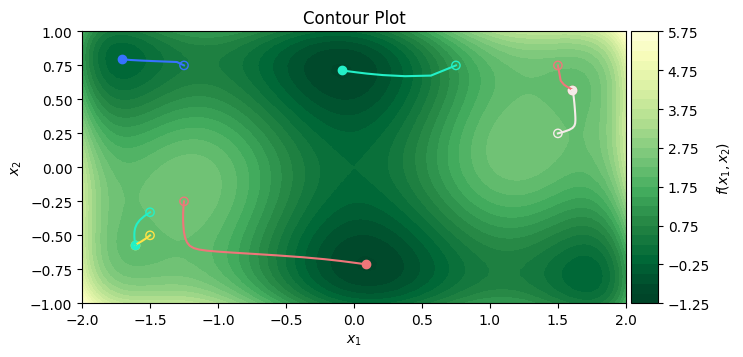

In [ ]:
grad_f = lambda x1, x2: np.array([2*x1**5 -(42./5.)*x1**3 + 8.*x1 + x2, 16*x2**3 - 8*x2 + x1])
norm_grad_f = lambda x1, x2: np.linalg.norm(grad_f(x1, x2))

norm_grad_f = np.vectorize(norm_grad_f)

def basic_gradient_descent(x0: np.ndarray, alpha: float, n_iter: int, f, grad_f) -> np.ndarray:
  """
  This function performs gradient descent from x0 with step size alpha
  for n_iter iterations. It returns a list of all the points visited by the
  descent algorithm.
  """
  x = x0
  path = np.array([x])
  for _ in range(n_iter):
    x = x - alpha*grad_f(x[0], x[1])
    path = np.vstack([path, x])
  return path

plt.clf()

fig, ax = plt.subplots()

# Contour plot of the function
ax.set_title('Contour Plot')
ax.set_aspect('equal')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')


contour = ax.contourf(xx1, xx2, z, cmap='YlGn_r', levels=30, vmin=ceil(z.min()), vmax=ceil(z.max()))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar2 = fig.colorbar(contour, label=r'$f(x_1, x_2)$', cax=cax)
cbar2.set_ticks(contour.levels[::4])
plt.subplots_adjust(left=0.05, right=0.95, wspace=0.3)

# Plot the gradient descent path from a collection of starting points
starting_points = np.array([
    # [0, 0],
    # [0.25, 0],
    [0.75, 0.75],
    [1.5, 0.75],
    [1.5, 0.25],
    [-1.25, 0.75],
    [-1.5, -0.5],
    [-1.5, -0.33],
    # [-0.75, 0.33],
    [-1.25, -0.25]
])

colors = ['#23F0C7', '#EF767A', '#F4EBE8', '#3772FF', '#FFE347']
ax.set_prop_cycle(cycler('color', colors))
for point in starting_points:
  path = basic_gradient_descent(point, alpha=0.05, n_iter=100, f=f, grad_f=grad_f)

  X, Y = path[:, 0], path[:, 1]

  color = ax._get_lines.get_next_color()

  ax.plot(X, Y, f'-', color=color)
  ax.scatter(X[-1], Y[-1], color=color)
  ax.scatter(X[0], Y[0], facecolor='none', edgecolor=color)

  # Check when the convergence criteria is satisfied within the path
  convergence_len = 0
  for i in range(len(path)-1):
    if norm_grad_f(X[i], Y[i]) < 1e-5:
      convergence_len = i
      break

  print(f"Descent path: ({X[0]: .3f}, {Y[0]: .3f}) -> ({X[-1]: .3f}, {Y[-1]: .3f}). Iterations for convergence = {convergence_len: d}")

ax.set_ylim(-1, 1)
ax.set_xlim(-2, 2)
plt.show()

Although we perform 100 iterations for each starting point, we can see that the convergence criterion $\parallel \nabla f(\mathbf{x}^{k+1}) \parallel < 10^{-5}$ is satisfied before.

The previous plot is represents the path followed by the basic gradient descent algorithm for different starting points. Starting points are marked as empty circles, whereas final convergence points as filled circles. We can see that, indeed, the path from a starting point generally converges to the minimum located in the valley where the starting point belongs.

#### (2) Let us perform an improvement to the previous algorithm. Indeed, until now we have considered a constant value for $\alpha^k$. Let us now consider adapting the value of $\alpha^k$ at each iteration (backtracking). In this exercise, you are asked to implement the backtracking algorithm and compare its performance to the basic (constant step size) gradient descent algorithm.

Descent path: ( 0.750,  0.750) -> (-0.090,  0.713). Path length =  10
Descent path: ( 1.500,  0.750) -> ( 1.704, -0.796). Path length =  17
Descent path: ( 1.500,  0.250) -> (-0.090,  0.713). Path length =  11
Descent path: (-1.250,  0.750) -> (-1.704,  0.796). Path length =  11
Descent path: (-1.500, -0.500) -> (-0.090,  0.713). Path length =  12
Descent path: (-1.500, -0.330) -> ( 0.090, -0.713). Path length =  12
Descent path: (-1.250, -0.250) -> (-1.704,  0.796). Path length =  21


<Figure size 640x480 with 0 Axes>

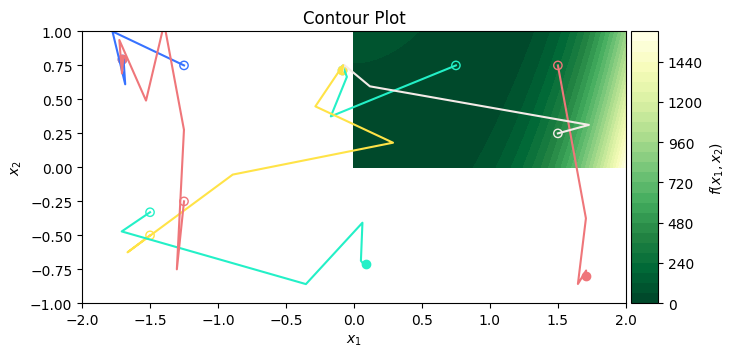

In [ ]:
def backtracking_gradient_descent(x0: np.ndarray, f, grad_f, alpha_0=1, z_tol=1.e-5) -> np.ndarray:
  """
  This function performs gradient descent from x0 adapting the step size
  at each iteration using backtracking. It returns a list of all the points
  visited by the descent algorithm.
  """
  x = x0
  path = np.array([x])

  converged = False
  while not converged:
    alpha = alpha_0

    f_decreased = f(*(x - alpha*grad_f(x[0], x[1]))) < f(*x)
    while not f_decreased:
      alpha /= 2
      f_decreased = f(*(x - alpha*grad_f(x[0], x[1]))) < f(*x)

    x = x - alpha*grad_f(x[0], x[1])
    path = np.vstack([path, x])

    converged = np.linalg.norm(grad_f(*x)) < z_tol

  return path

plt.clf()

fig, ax = plt.subplots()

# Contour plot of the function
ax.set_title('Contour Plot')
ax.set_aspect('equal')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')


contour = ax.contourf(xx1, xx2, z, cmap='YlGn_r', levels=30, vmin=ceil(z.min()), vmax=ceil(z.max()))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar2 = fig.colorbar(contour, label=r'$f(x_1, x_2)$', cax=cax)
cbar2.set_ticks(contour.levels[::4])
plt.subplots_adjust(left=0.05, right=0.95, wspace=0.3)

# Plot the gradient descent path from a collection of starting points
starting_points = np.array([
    # [0, 0],
    # [0.25, 0],
    [0.75, 0.75],
    [1.5, 0.75],
    [1.5, 0.25],
    [-1.25, 0.75],
    [-1.5, -0.5],
    [-1.5, -0.33],
    # [-0.75, 0.33],
    [-1.25, -0.25]
])


ax.set_prop_cycle(cycler('color', colors))
for point in starting_points:
  path = backtracking_gradient_descent(point, f=f, grad_f=grad_f)

  X, Y = path[:, 0], path[:, 1]

  color = ax._get_lines.get_next_color()

  ax.plot(X, Y, f'-', color=color)
  ax.scatter(X[-1], Y[-1], color=color)
  ax.scatter(X[0], Y[0], facecolor='none', edgecolor=color)

  print(f"Descent path: ({X[0]: .3f}, {Y[0]: .3f}) -> ({X[-1]: .3f}, {Y[-1]: .3f}). Path length = {len(path): d}")


ax.set_ylim(-1, 1)
ax.set_xlim(-2, 2)
plt.show()

As we can see, for the starting points we have tried, the number of iterations needed for convergence is significantly lower than 100 and, indeed, lower than the number of iterations needed when using constant step gradient descent.

## The Rosenbrock function

Let us consider the Rosenbrock function, which is $f: \mathbb{R} \to \mathbb{R}$ defined as
$$
  f(x_1, x_2) = (a-x_1)^2 + b(x_2-x_1^2)^2
$$
This function has a global minimum at $(x_1^*, x_2^*) = (a, a^2)$, where $f(x_1, x_2) = 0$. The global minimum is inside a long, very narrow, parabolic shaped valley. There are no local minimums.

#### (1) Plot the contours of the Rosenbrock function for $a=1$ and $b=100$. You may also draw the gradient information.

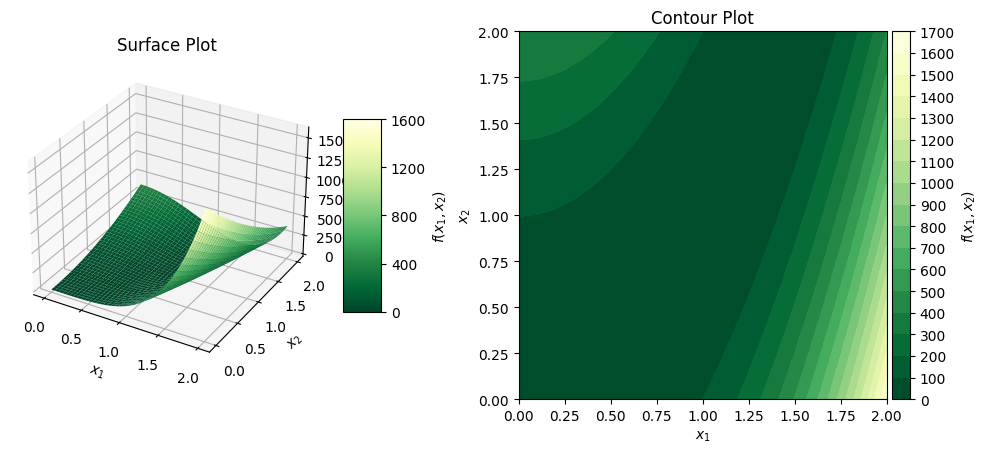

In [ ]:
# We will plot the function in the set [0, 2] x [0, 2].
x1_range = np.arange(0, 2.05, step=0.05)
x2_range = np.arange(0, 2.05, step=0.05)

xx1, xx2 = np.meshgrid(x1_range, x2_range)

# Define our function of interest as rosenbrock
def rosenbrock(x1, x2, a=1, b=100):
  return (a-x1)**2 + b*(x2-x1**2)**2

z = rosenbrock(xx1, xx2)

# Plot the function
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)


# Surface plot of the function
ax1.set_title('Surface Plot')
ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$x_2$')
ax1.set_zlabel(r'$f(x_1, x_2)$')

surface = ax1.plot_surface(xx1, xx2, z, cmap='YlGn_r', vmin=ceil(z.min()), vmax=ceil(z.max()))
cbar1 = fig.colorbar(surface, shrink=.5, aspect=5, label=r'$f(x_1, x_2)$')
cbar1.set_ticks(np.linspace(ceil(z.min()), z.max()-1, num=5))

# Contour plot of the function
ax2.set_title('Contour Plot')
ax2.set_aspect('equal')
ax2.set_xlabel(r'$x_1$')
ax2.set_ylabel(r'$x_2$')

contour = ax2.contourf(xx1, xx2, z, cmap='YlGn_r', levels=19)


divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar2 = fig.colorbar(contour, label=r'$f(x_1, x_2)$', cax=cax, extend="max")
cbar2.set_ticks(contour.levels)
plt.subplots_adjust(left=0.05, right=0.95, wspace=0.3)
plt.show()

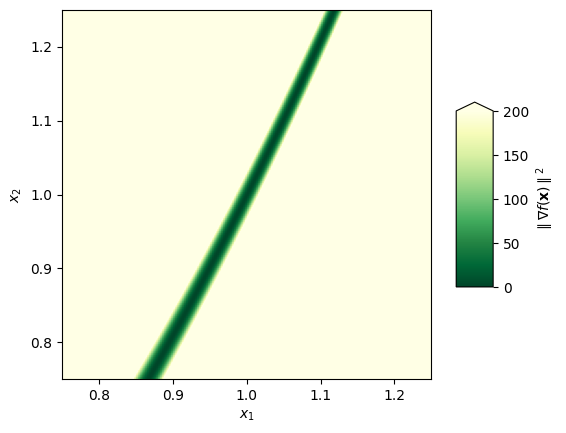

In [ ]:
# Gradient of the function
def grad_rosenbrock(x1, x2, a=1, b=100):
  return np.array([2*(x1-a) - 4*b*x1*(x2-x1**2), 2*b*(x2-x1**2)])

# Plot the norm squared of the gradient of the function

def norm_grad_rosenbrock(x1, x2, a=1, b=100):
  return np.linalg.norm(grad_rosenbrock(x1, x2, a, b))**2

norm_grad_rosenbrock = np.vectorize(norm_grad_rosenbrock)

XY_STEP = 0.0025

x1_range = np.arange(0.75, 1.25, step=XY_STEP)
x2_range = np.arange(0.75, 1.25, step=XY_STEP)

xx1, xx2 = np.meshgrid(x1_range, x2_range)

# The matrix z will store the values of the norm of the gradient
z = norm_grad_rosenbrock(xx1, xx2)

# A view of the matrix containing the values of the squared norm of the gradient
# is plotted below
fig, ax = plt.subplots()

val = ax.imshow(z, cmap=plt.get_cmap('YlGn_r'), vmin=0, vmax=200, extent=[.75, 1.25, 1.25, .75])
ax.invert_yaxis()
cbar = fig.colorbar(val, shrink=.5, aspect=5, extend='max', label=r'$\parallel \nabla f(\mathbf{x}) \parallel^2$')

ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
plt.show()


#### (2) Try different starting points $\mathbf{x^0}$ in order to check the robustness of backtracking gradient descent. Draw the path the gradient descent follows in order to see how good your algorithm performs. How many iterations are performed until the stopping criterion is satisfied?                                                                                                                                                                                                                                                                                                                                                        

Descent path: (0.500, 0.500) -> (1.000, 1.000). Path length =  10647
Descent path: (1.100, 1.100) -> (1.000, 1.000). Path length =  10074
Descent path: (2.000, 0.000) -> (1.000, 1.000). Path length =  10786
Descent path: (1.500, 1.100) -> (1.000, 1.000). Path length =  10799
Descent path: (0.750, 0.750) -> (1.000, 1.000). Path length =  10353
Descent path: (0.750, 1.250) -> (1.000, 1.000). Path length =  9104
Descent path: (1.250, 0.750) -> (1.000, 1.000). Path length =  11097


<Figure size 640x480 with 0 Axes>

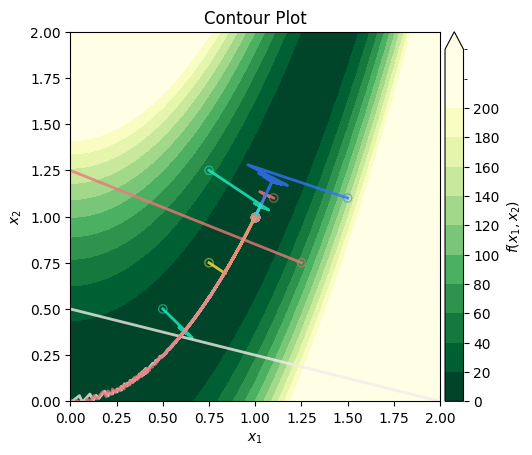

In [ ]:
plt.clf()

from matplotlib.colors import BoundaryNorm, ListedColormap

fig, ax = plt.subplots()

# Contour plot of the function
ax.set_title('Contour Plot')
ax.set_aspect('equal')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')


# We will plot the function in the set [0, 2] x [0, 2].
x1_range = np.arange(0, 2.05, step=0.05)
x2_range = np.arange(0, 2.05, step=0.05)

xx1, xx2 = np.meshgrid(x1_range, x2_range)

z = rosenbrock(xx1, xx2)

threshold = 200

levels_below = np.arange(0, threshold+1, 20)
levels_above = np.linspace(threshold+1, z.max(), 2)
levels = np.concatenate([levels_below, levels_above])

cmap_below = plt.get_cmap('YlGn_r')
cmap_above = ListedColormap([cmap_below(1.0)])
cmap_combined = np.vstack((cmap_below(np.linspace(0, 1, len(levels_below))), cmap_above(np.ones(1))))
cmap = ListedColormap(cmap_combined)

norm = BoundaryNorm(levels, cmap.N)

contour = ax.contourf(xx1, xx2, z, cmap=cmap, levels=levels, norm=norm, extend='max')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar2 = fig.colorbar(contour, label=r'$f(x_1, x_2)$', cax=cax, extend='max')
cbar2.set_ticks(levels_below)
plt.subplots_adjust(left=0.05, right=0.95, wspace=0.3)

# Plot the gradient descent path from a collection of starting points
starting_points = np.array([
    [0.5, 0.5],
    [1.1, 1.1],
    [2, 0],
    [1.5, 1.1],
    [0.75, 0.75],
    [0.75, 1.25],
    [1.25, 0.75],
])

ax.set_prop_cycle(cycler('color', colors))
for point in starting_points:
  path = backtracking_gradient_descent(point, f=rosenbrock, grad_f=grad_rosenbrock, alpha_0=0.05)

  X, Y = path[:, 0], path[:, 1]

  color = ax._get_lines.get_next_color()

  ax.plot(X, Y, f'-', color=color, alpha=0.8, lw=2)
  ax.scatter(X[-1], Y[-1], color=color, alpha=0.8)
  ax.scatter(X[0], Y[0], facecolor='none', edgecolor=color, alpha=0.5)

  print(f"Descent path: ({X[0]:.3f}, {Y[0]:.3f}) -> ({X[-1]:.3f}, {Y[-1]:.3f}). Path length = {len(path): d}")


ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
plt.show()

As can be seen, the minimum can be reached when the stopping criterion are fulfilled, but the number of iterations needed is significantly high, of the order of $10000$.

# Newton descent method

## A simple quadratic function

In this section, we will be working with the function
$$
  f(x_1, x_2) = 100x_1^2 + x_2^2
$$

#### (1) Minimize the function using the backtracking gradient descent algorithm.


First of all, we will plot the function in the domain $[-10, 10] \times [-10, 10]$.

<Figure size 640x480 with 0 Axes>

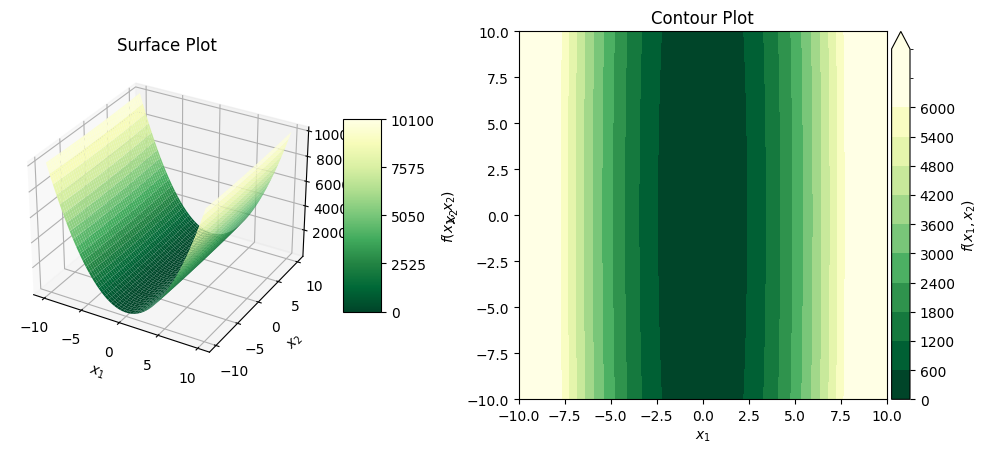

In [ ]:
plt.clf()

def f(x):
  return 100*x[0]**2 + x[1]**2
def grad_f(x):
  return np.array([200*x[0], 2*x[1]])
def hess_f(x):
  return np.array([[200, 0], [0, 2]])

x1 = np.linspace(-10, 10, num=200)
x2 = np.linspace(-10, 10, num=200)
[xx1,xx2] = np.meshgrid(x1,x2)

z = f([xx1, xx2])

# Plot the function
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)


# Surface plot of the function
ax1.set_title('Surface Plot')
ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$x_2$')
ax1.set_zlabel(r'$f(x_1, x_2)$')

surface = ax1.plot_surface(xx1, xx2, z, cmap='YlGn_r', vmin=z.min(), vmax=z.max())
cbar1 = fig.colorbar(surface, shrink=.5, aspect=5, label=r'$f(x_1, x_2)$')
cbar1.set_ticks(np.linspace(z.min(), z.max(), num=5))

# Contour plot of the function
ax2.set_title('Contour Plot')
ax2.set_aspect('equal')
ax2.set_xlabel(r'$x_1$')
ax2.set_ylabel(r'$x_2$')

ax2.set_xlim(-10, 10)
ax2.set_ylim(-10, 10)

threshold = 6000

levels_below = np.arange(0, threshold+1, 600)
levels_above = np.linspace(threshold+10, 100000, 2)
levels = np.concatenate([levels_below, levels_above])

cmap_below = plt.get_cmap('YlGn_r')
cmap_above = ListedColormap([cmap_below(1.0)])
cmap_combined = np.vstack((cmap_below(np.linspace(0, 1, len(levels_below))), cmap_above(np.ones(1))))
cmap = ListedColormap(cmap_combined)

norm = BoundaryNorm(levels, cmap.N)

contour = ax2.contourf(xx1, xx2, z, cmap=cmap, levels=levels, norm=norm, extend='max')


divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar2 = fig.colorbar(contour, label=r'$f(x_1, x_2)$', cax=cax, extend='max')
cbar2.set_ticks(levels_below)
plt.subplots_adjust(left=0.05, right=0.95, wspace=0.3)


plt.show()

Descent path: (-5.705, -8.482) -> ( 0.000, -0.000). Iters. for convergence =  658
Descent path: ( 3.876,  7.896) -> ( 0.000,  0.000). Iters. for convergence =  655
Descent path: (-1.003,  1.412) -> (-0.000,  0.000). Iters. for convergence =  581
Descent path: ( 6.806,  2.018) -> (-0.000,  0.000). Iters. for convergence =  598
Descent path: ( 0.062,  3.160) -> ( 0.000,  0.000). Iters. for convergence =  613


<Figure size 640x480 with 0 Axes>

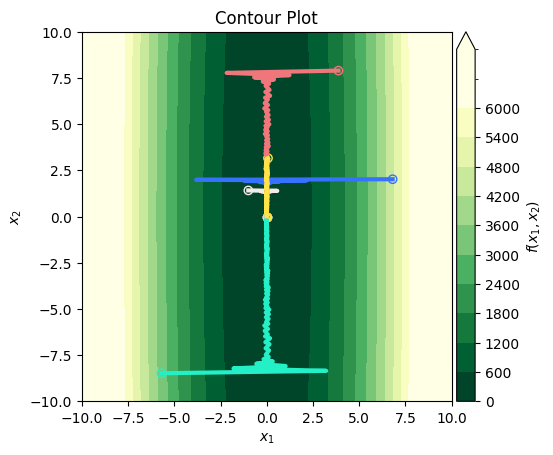

In [ ]:
def backtracking_gradient_descent(x0: np.ndarray, f, grad_f, alpha_0=1, z_tol=1.e-5) -> np.ndarray:
  """
  This function performs gradient descent from x0 adapting the step size
  at each iteration using backtracking. It returns a list of all the points
  visited by the descent algorithm.
  """
  x = x0
  path = np.array([x])

  converged = False
  while not converged:
    alpha = alpha_0

    f_decreased = f(x - alpha*grad_f(x)) < f(x)
    while not f_decreased:
      alpha /= 2
      f_decreased = f(x - alpha*grad_f(x)) < f(x)

    x = x - alpha*grad_f(x)
    path = np.vstack([path, x])

    converged = np.linalg.norm(grad_f(x)) < z_tol

  return path


plt.clf()

fig, ax = plt.subplots()

# Contour plot of the function
ax.set_title('Contour Plot')
ax.set_aspect('equal')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')


contour = ax.contourf(xx1, xx2, z, cmap=cmap, levels=levels, norm=norm, extend='max')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar2 = fig.colorbar(contour, label=r'$f(x_1, x_2)$', cax=cax)
cbar2.set_ticks(levels_below)
plt.subplots_adjust(left=0.05, right=0.95, wspace=0.3)

# Plot the gradient descent path from a collection of starting points
x1_random = np.random.uniform(low=-10, high=10, size=5)
x2_random = np.random.uniform(low=-10, high=10, size=5)
starting_points = np.array(list(zip(x1_random, x2_random)))

colors = ['#23F0C7', '#EF767A', '#F4EBE8', '#3772FF', '#FFE347']
ax.set_prop_cycle(cycler('color', colors))
for point in starting_points:
  path = backtracking_gradient_descent(point, f=f, grad_f=grad_f, alpha_0=1)
  X, Y = path[:, 0], path[:, 1]

  color = ax._get_lines.get_next_color()

  ax.plot(X, Y, f'-', color=color, lw=3)
  ax.scatter(X[-1], Y[-1], color=color)
  ax.scatter(X[0], Y[0], facecolor='none', edgecolor=color)


  print(f"Descent path: ({X[0]: .3f}, {Y[0]: .3f}) -> ({X[-1]: .3f}, {Y[-1]: .3f}). Iters. for convergence = {len(path)-1: d}")

ax.set_ylim(-10, 10)
ax.set_xlim(-10, 10)
plt.show()

In [ ]:
def newton_descent(x0: np.ndarray, f, grad_f, hess_f, a_k0=1, z_tol=1.e-5):
  """
  Performs Newton's method for optimization.

  Args:
    x0: Initial guess.
    f: Objective function.
    grad_f: Gradient of the objective function.
    a_k: Step size.
    z_tol: Tolerance for convergence.

  Returns:
    The path taken by the optimization algorithm.
  """
  newton_path = [x0] # Initialize path with the starting point
  converged = False
  while not converged:
    a_k=a_k0
    d_k = np.linalg.solve(hess_f(x0), -grad_f(x0))
    while not f(x0 + a_k * d_k) < f(x0):
      a_k = a_k/2
    x0 = x0 + a_k * d_k
    newton_path.append(x0)
    converged = np.linalg.norm(grad_f(x0)) < z_tol
  return np.array(newton_path) # Convert path to a NumPy array


Descent path: (-5.705, -8.482) -> ( 0.000,  0.000). Iters. for convergence =  2
Descent path: ( 3.876,  7.896) -> ( 0.000,  0.000). Iters. for convergence =  2
Descent path: (-1.003,  1.412) -> ( 0.000,  0.000). Iters. for convergence =  2
Descent path: ( 6.806,  2.018) -> ( 0.000,  0.000). Iters. for convergence =  2
Descent path: ( 0.062,  3.160) -> ( 0.000,  0.000). Iters. for convergence =  2


<Figure size 640x480 with 0 Axes>

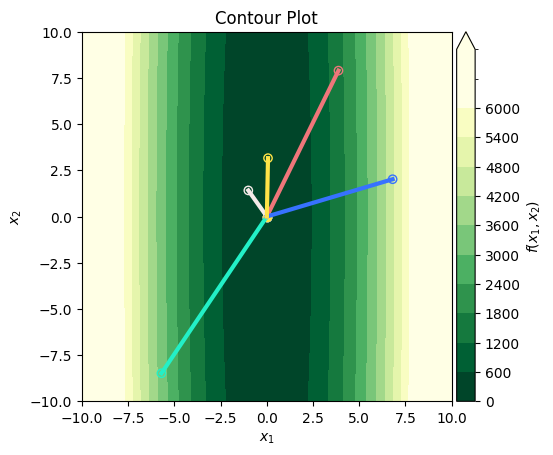

In [ ]:
plt.clf()

fig, ax = plt.subplots()

# Contour plot of the function
ax.set_title('Contour Plot')
ax.set_aspect('equal')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')


contour = ax.contourf(xx1, xx2, z, cmap=cmap, levels=levels, norm=norm, extend='max')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar2 = fig.colorbar(contour, label=r'$f(x_1, x_2)$', cax=cax)
cbar2.set_ticks(levels_below)
plt.subplots_adjust(left=0.05, right=0.95, wspace=0.3)


colors = ['#23F0C7', '#EF767A', '#F4EBE8', '#3772FF', '#FFE347']
ax.set_prop_cycle(cycler('color', colors))
for point in starting_points:
  path = newton_descent(point, f=f, grad_f=grad_f, hess_f=hess_f, a_k0=1)
  X, Y = path[:, 0], path[:, 1]

  color = ax._get_lines.get_next_color()

  ax.plot(X, Y, f'-', color=color, lw=3)
  ax.scatter(X[-1], Y[-1], color=color)
  ax.scatter(X[0], Y[0], facecolor='none', edgecolor=color)


  print(f"Descent path: ({X[0]: .3f}, {Y[0]: .3f}) -> ({X[-1]: .3f}, {Y[-1]: .3f}). Iters. for convergence = {len(path)-1: d}")

ax.set_ylim(-10, 10)
ax.set_xlim(-10, 10)
plt.show()

## The Rosenbrock Function

In this section, we will will be considering again the Rosenbrock function, as defined in section \ref{sec:rosenbrock1}, assuming the parameter values $a=1$ and $b=100$.

#### (1) Recover the experiments from \ref{sec:rosenbrock1} and the same initial starting points. Try now to use the combined Newton-gradient descent algorithm and see how many iterations are required to reach the minimum. Use two different colors to show which of both methods is used at each iteration.



Descent path: (0.500, 0.500) -> (1.000, 1.000). Iters. for convergence =  8
Descent path: (1.100, 1.100) -> (1.000, 1.000). Iters. for convergence =  3
Descent path: (2.000, 0.000) -> (1.000, 1.000). Iters. for convergence =  14
Descent path: (1.500, 1.100) -> (1.000, 1.000). Iters. for convergence =  10
Descent path: (0.750, 0.750) -> (1.000, 1.000). Iters. for convergence =  7
Descent path: (0.750, 1.250) -> (1.000, 1.000). Iters. for convergence =  7
Descent path: (1.250, 0.750) -> (1.000, 1.000). Iters. for convergence =  7


<Figure size 640x480 with 0 Axes>

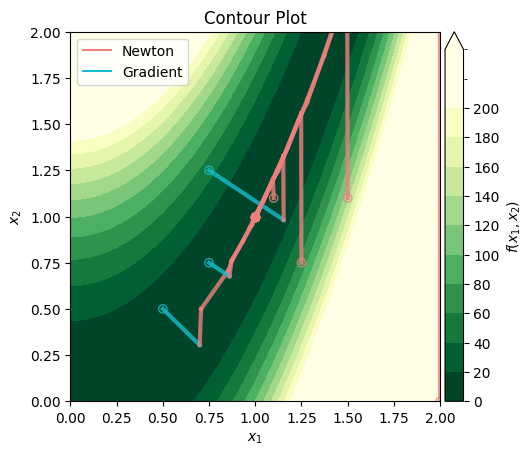

In [ ]:
import numpy as np
import random
from scipy.linalg import eig


def rosenbrock(x, a=1, b=100):
  return (a-x[0])**2 + b*(x[1]-x[0]**2)**2

def grad_rosenbrock(x, a=1, b=100):
  return np.array([2*(x[0]-a) - 4*b*x[0]*(x[1]-x[0]**2), 2*b*(x[1]-x[0]**2)])

def hess_rosenbrock(x, a=1, b=100):
  return np.array([[12*b*x[0]**2 - 4*b*x[1] + 2, -4*b*x[0]],
                   [-4*b*x[0], 2*b]])


def gradient_newton_descent(x0, f, grad_f, hess_f, a_k0=1, z_tol=1.e-3):
  """
  performs Newton's method for optimization.

  x0: Initial guess.
  f: Objective function.
  grad_f: Gradient of the objective function.
  a_k: Step size.
  z_tol: Tolerance for convergence.

  Returns: the path taken by the optimization algorithm.
  """
  path = [x0] # Initialize path with the starting point
  method = []
  a_k = a_k0
  converged = False
  while not converged:
    w,v = eig(hess_f(x0))
    a_k = a_k0
    #if all eigenvalues are positive, we implement newton descent
    if np.all(w > 0):
      d_k = np.linalg.solve(hess_f(x0), -grad_f(x0))
      while not f(x0 + a_k * d_k) < f(x0):
        a_k = a_k/2
      x0 = x0 + a_k * d_k
      path.append(x0)
      method.append('newton')
    #otherwise, we implement basic gradient descent
    else:
      while not f(x0 - a_k * grad_f(x0)) < f(x0):
        a_k = a_k/2
      x0 = x0 - a_k * grad_f(x0)
      path.append(x0)
      method.append('gradient')
    converged = np.linalg.norm(grad_f(x0)) < z_tol

  return np.array(path), method

plt.clf()

from matplotlib.colors import BoundaryNorm, ListedColormap
import matplotlib.lines as mlines

fig, ax = plt.subplots()

# Contour plot of the function
ax.set_title('Contour Plot')
ax.set_aspect('equal')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')


# We will plot the function in the set [0, 2] x [0, 2].
x1_range = np.arange(0, 2.05, step=0.05)
x2_range = np.arange(0, 2.05, step=0.05)

xx1, xx2 = np.meshgrid(x1_range, x2_range)

z = rosenbrock([xx1, xx2])

threshold = 200

levels_below = np.arange(0, threshold+1, 20)
levels_above = np.linspace(threshold+1, z.max(), 2)
levels = np.concatenate([levels_below, levels_above])

cmap_below = plt.get_cmap('YlGn_r')
cmap_above = ListedColormap([cmap_below(1.0)])
cmap_combined = np.vstack((cmap_below(np.linspace(0, 1, len(levels_below))), cmap_above(np.ones(1))))
cmap = ListedColormap(cmap_combined)

norm = BoundaryNorm(levels, cmap.N)

contour = ax.contourf(xx1, xx2, z, cmap=cmap, levels=levels, norm=norm, extend='max')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar2 = fig.colorbar(contour, label=r'$f(x_1, x_2)$', cax=cax, extend='max')
cbar2.set_ticks(levels_below)
plt.subplots_adjust(left=0.05, right=0.95, wspace=0.3)

# Plot the gradient descent path from a collection of starting points
starting_points = np.array([
    [0.5, 0.5],
    [1.1, 1.1],
    [2, 0],
    [1.5, 1.1],
    [0.75, 0.75],
    [0.75, 1.25],
    [1.25, 0.75],
])

# ax.set_prop_cycle(cycler('color', colors))
colors = {'newton': 'lightcoral', 'gradient': 'tab:cyan'}
for point in starting_points:
  path, method = gradient_newton_descent(point, f=rosenbrock, grad_f=grad_rosenbrock, hess_f=hess_rosenbrock, a_k0=1)

  X, Y = path[:, 0], path[:, 1]


  ax.scatter(X[0], Y[0], facecolor='none', edgecolor=colors[method[0]], alpha=0.8)
  for i in range(len(X)-1):
    color = colors[method[i]]
    ax.plot([X[i], X[i+1]], [Y[i], Y[i+1]], f'-', color=color, alpha=0.8, lw=3)
  ax.scatter(X[-1], Y[-1], color=colors[method[-1]], alpha=0.8)

  print(f"Descent path: ({X[0]:.3f}, {Y[0]:.3f}) -> ({X[-1]:.3f}, {Y[-1]:.3f}). Iters. for convergence = {len(path)-1: d}")


ax.set_xlim(0, 2)
ax.set_ylim(0, 2)

newt_line = mlines.Line2D([], [], color='lightcoral', label='Newton')
grad_line = mlines.Line2D([], [], color='tab:cyan', label='Gradient')

ax.legend(handles=[newt_line, grad_line])


plt.show()


Descent path: ( 0.750,  0.750) -> (-0.090,  0.713). Iters. for convergence =  5
Descent path: ( 1.500,  0.750) -> ( 1.607,  0.569). Iters. for convergence =  5
Descent path: ( 1.500,  0.250) -> (-0.090,  0.713). Iters. for convergence =  6
Descent path: (-1.250,  0.750) -> (-1.704,  0.796). Iters. for convergence =  5
Descent path: (-1.500, -0.500) -> (-1.607, -0.569). Iters. for convergence =  5
Descent path: (-1.500, -0.330) -> (-1.607, -0.569). Iters. for convergence =  6
Descent path: (-1.250, -0.250) -> (-1.704,  0.796). Iters. for convergence =  8


<Figure size 640x480 with 0 Axes>

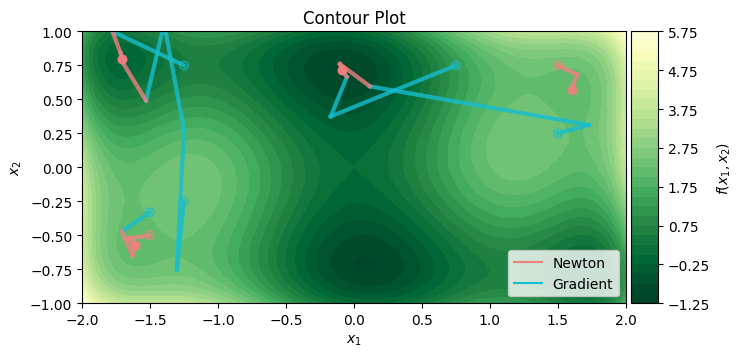

In [ ]:
import numpy as np
import random
from scipy.linalg import eig


def f(x: np.ndarray):
  return x[0]**2*(4-2.1*x[0]**2+(1/3)*x[0]**4) + x[0]*x[1] + x[1]**2*(-4+4*x[1]**2)

def grad_f(x: np.ndarray):
  x1 = x[0]
  x2 = x[1]
  return np.array([2*x1**5 -(42./5.)*x1**3 + 8.*x1 + x2, 16*x2**3 - 8*x2 + x1])

def hess_f(x: np.ndarray):
  return np.array([[8-25.2*(x[0]**2)+10*(x[0]**4) , 1],
                [1 , -8+48*(x[1]**2)]])



plt.clf()

from matplotlib.colors import BoundaryNorm, ListedColormap
import matplotlib.lines as mlines

fig, ax = plt.subplots()

# Contour plot of the function
ax.set_title('Contour Plot')
ax.set_aspect('equal')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')


# We will plot the function in the set [0, 2] x [0, 2].
x1_range = np.arange(-2, 2.05, step=0.05)
x2_range = np.arange(-1, 1.05, step=0.05)

xx1, xx2 = np.meshgrid(x1_range, x2_range)

z = f([xx1, xx2])

contour = ax.contourf(xx1, xx2, z, cmap='YlGn_r', levels=30, vmin=ceil(z.min()), vmax=ceil(z.max()))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar2 = fig.colorbar(contour, label=r'$f(x_1, x_2)$', cax=cax)
cbar2.set_ticks(contour.levels[::4])
plt.subplots_adjust(left=0.05, right=0.95, wspace=0.3)

# Plot the gradient descent path from a collection of starting points
starting_points = np.array([
    # [0, 0],
    # [0.25, 0],
    [0.75, 0.75],
    [1.5, 0.75],
    [1.5, 0.25],
    [-1.25, 0.75],
    [-1.5, -0.5],
    [-1.5, -0.33],
    # [-0.75, 0.33],
    [-1.25, -0.25]
])

# ax.set_prop_cycle(cycler('color', colors))
colors = {'newton': 'lightcoral', 'gradient': 'tab:cyan'}
for point in starting_points:
  path, method = gradient_newton_descent(point, f=f, grad_f=grad_f, hess_f=hess_f, a_k0=1)

  X, Y = path[:, 0], path[:, 1]


  ax.scatter(X[0], Y[0], facecolor='none', edgecolor=colors[method[0]], alpha=0.8)
  for i in range(len(X)-1):
    color = colors[method[i]]
    ax.plot([X[i], X[i+1]], [Y[i], Y[i+1]], f'-', color=color, alpha=0.8, lw=3)
  ax.scatter(X[-1], Y[-1], color=colors[method[-1]], alpha=0.8)

  print(f"Descent path: ({X[0]: .3f}, {Y[0]: .3f}) -> ({X[-1]: .3f}, {Y[-1]: .3f}). Iters. for convergence = {len(path): d}")


ax.set_xlim(-2, 2)
ax.set_ylim(-1, 1)

newt_line = mlines.Line2D([], [], color='lightcoral', label='Newton')
grad_line = mlines.Line2D([], [], color='tab:cyan', label='Gradient')

ax.legend(handles=[newt_line, grad_line])


plt.show()
